In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
# ====== Load Data ======
file_path = 'ecg_hr_125hz_wawan2.csv'  # Ganti sesuai lokasi file
data = pd.read_csv(file_path)

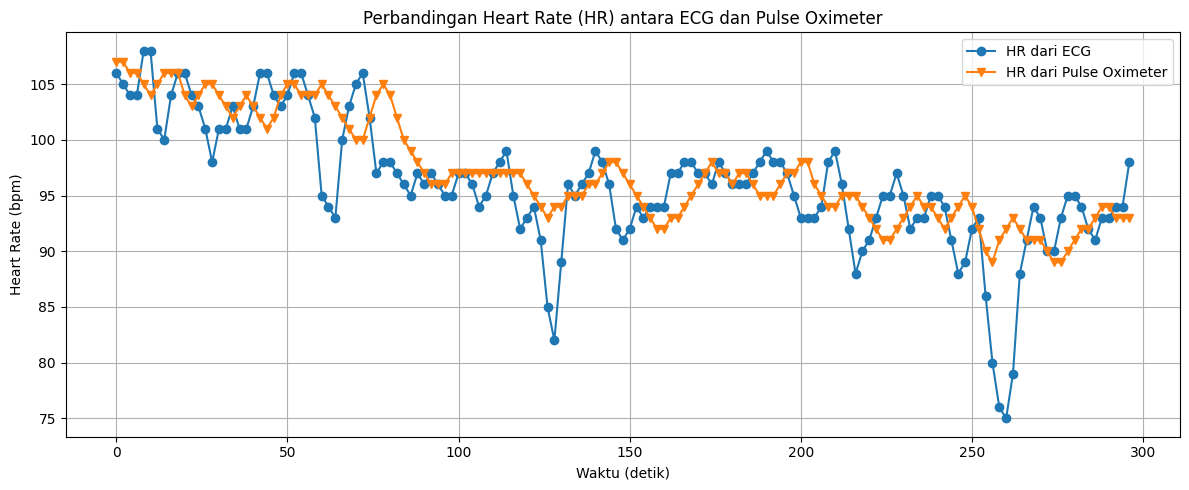

In [71]:
# ====== Plot HR ECG vs Pulse Oximeter ======
plt.figure(figsize=(12, 5))
plt.plot(data['window_start_s'], data['HR_ECG'], label='HR dari ECG', marker='o')
plt.plot(data['window_start_s'], data['HR_PulseOx'], label='HR dari Pulse Oximeter', marker='v')
plt.title('Perbandingan Heart Rate (HR) antara ECG dan Pulse Oximeter')
plt.xlabel('Waktu (detik)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [72]:
# ====== Analisis Perbedaan ======
data['selisih'] = data['HR_ECG'] - data['HR_PulseOx']
mean_selisih = data['selisih'].mean()
max_selisih = data['selisih'].abs().max()

print(f"Rata-rata selisih HR: {mean_selisih:.2f} bpm")
print(f"Selisih maksimum: {max_selisih:.2f} bpm")

Rata-rata selisih HR: -1.07 bpm
Selisih maksimum: 17.00 bpm


In [73]:
# ====== Hitung Akurasi Persentase Tiap Titik ======
data['akurasi_persen'] = (1 - abs(data['HR_ECG'] - data['HR_PulseOx']) / data['HR_ECG']) * 100

# ====== Rata-rata Akurasi Keseluruhan ======
mean_akurasi = data['akurasi_persen'].mean()

print(f"Rata-rata Akurasi HR Pulse Oximeter terhadap ECG: {mean_akurasi:.2f}%")

Rata-rata Akurasi HR Pulse Oximeter terhadap ECG: 96.75%


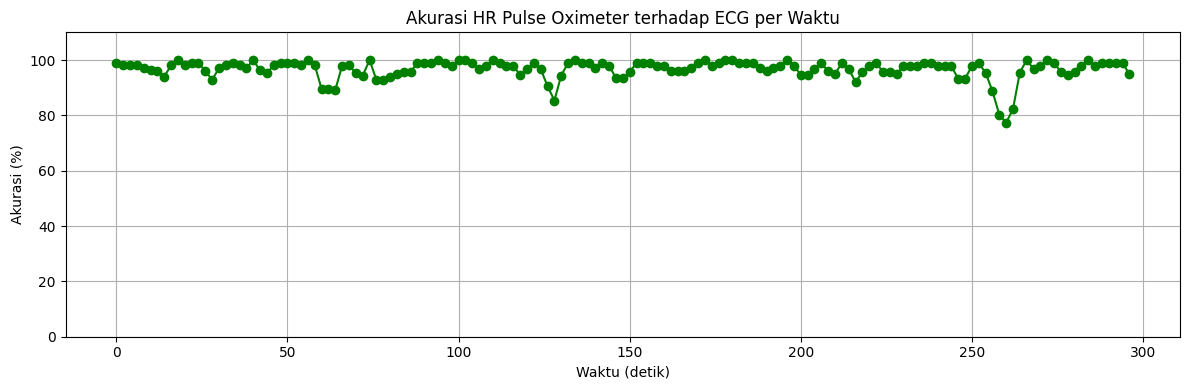

In [74]:
# ====== (Opsional) Plot Akurasi per Titik ======
plt.figure(figsize=(12, 4))
plt.plot(data['window_start_s'], data['akurasi_persen'], marker='o', color='green')
plt.title('Akurasi HR Pulse Oximeter terhadap ECG per Waktu')
plt.xlabel('Waktu (detik)')
plt.ylabel('Akurasi (%)')
plt.grid(True)
plt.ylim(0, 110)
plt.tight_layout()
plt.show()

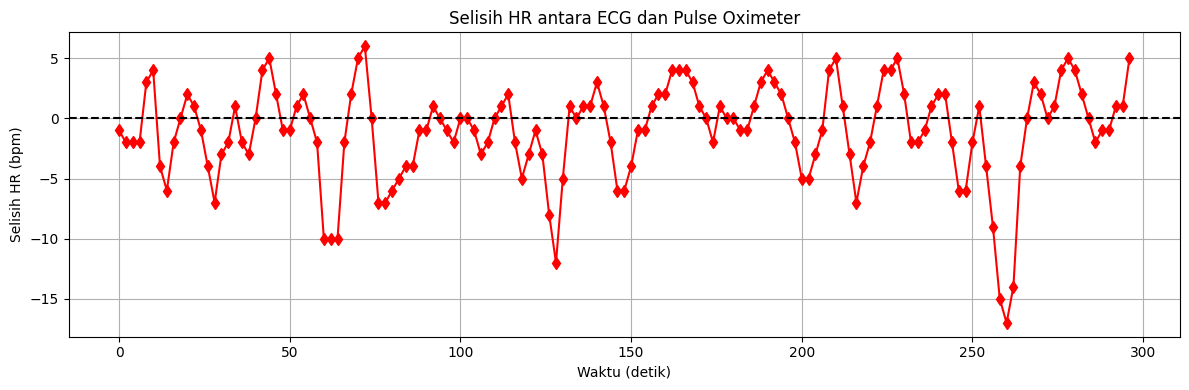

In [75]:
# ====== Plot Selisih HR ======
plt.figure(figsize=(12, 4))
plt.plot(data['window_start_s'], data['selisih'], color='red', marker='d')
plt.axhline(0, color='black', linestyle='--')
plt.title('Selisih HR antara ECG dan Pulse Oximeter')
plt.xlabel('Waktu (detik)')
plt.ylabel('Selisih HR (bpm)')
plt.grid(True)
plt.tight_layout()
plt.show()